## Natural Language Processing with Disaster Tweets

Predict which Tweets are about real disasters and which ones are not

## Competition Description

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. Take this example:

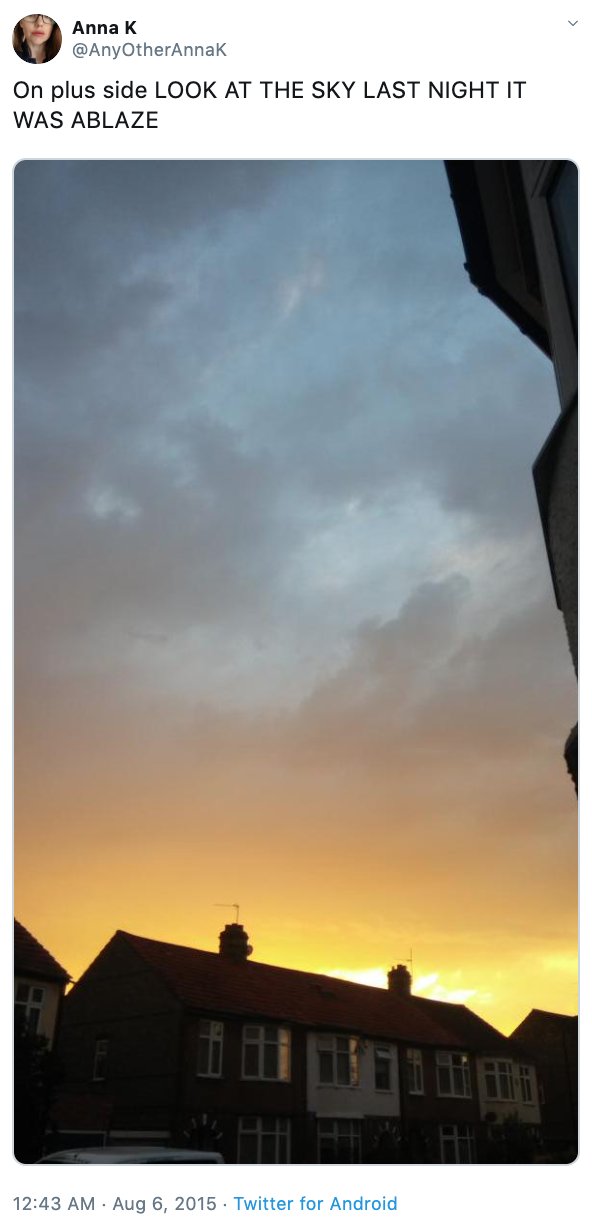

The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified.

## Acknowledgments

This dataset was created by the company figure-eight and originally shared on their [‘Data For Everyone’ website here](https://appen.com/pre-labeled-datasets/).

Tweet source: https://twitter.com/AnyOtherAnnaK/status/629195955506708480

## Dataset Description

Each sample in the train and test set has the following information:
    
1. id column - a unique identifier for each tweet
2. keyword column - A keyword from that tweet (may be blank)
3. location column - Location of the tweet (may also be blank)
4. text column - Text of the tweet
5. target label - 1 or 0 Meaning Real Disater or Not a real diaster (in train.csv only)

## Files

- train.csv - the training set
- test.csv - the test set
- sample_submission.csv - a sample submission file in the correct format

## Load the datasets

In [1]:
## using pandas read_csv funtion to load csv files

import pandas as pd
train = pd.read_csv("/Users/brindhamanivannan/NLP/Disaster_Tweets/train.csv")
test = pd.read_csv("/Users/brindhamanivannan/NLP/Disaster_Tweets/test.csv")

## Explore the datasets

In [2]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
train.shape

(7613, 5)

In [5]:
test.shape

(3263, 4)

## Check for missing values

In [6]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## Check the frequency of the target column in train dataset

In [8]:
disaster_frequency = train['target'].value_counts().to_frame()
disaster_frequency

,target
0,4342
1,3271


Note:

The value_counts() method in pandas is used to return the frequency of each unique value in a given Series or DataFrame column. The to_frame() method is then used to convert the resulting Series object into a DataFrame object with a single column, which can be useful for further analysis or visualization.

## Visualize the target column

<AxesSubplot:ylabel='target'>

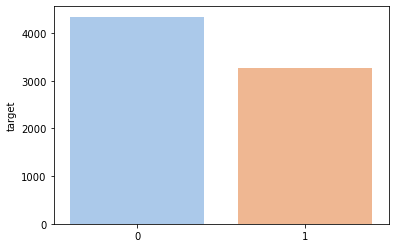

In [9]:
# Visualization library
import seaborn as sns

sns.barplot(data = disaster_frequency, x = disaster_frequency.index, y = "target", palette = "pastel")


## Further exploration

In [10]:
disaster_tweets = train[train.target==1].text.to_frame()
disaster_tweets.head()

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [11]:
disaster_tweets.shape

(3271, 1)

In [12]:
not_disaster_tweets = train[train.target==0].text.to_frame()
not_disaster_tweets.head()

,text
15,What's up man?
16,I love fruits
17,Summer is lovely
18,My car is so fast
19,What a goooooooaaaaaal!!!!!!


In [13]:
not_disaster_tweets.shape

(4342, 1)

## Most common keywords

In [14]:
most_common_keywords = train["keyword"].value_counts()[:20].to_frame()
most_common_keywords

,keyword
fatalities,45
deluge,42
armageddon,42
sinking,41
damage,41
harm,41
body%20bags,41
outbreak,40
evacuate,40
fear,40


## Visualize most common keywords

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'fatalities'),
  Text(1, 0, 'deluge'),
  Text(2, 0, 'armageddon'),
  Text(3, 0, 'sinking'),
  Text(4, 0, 'damage'),
  Text(5, 0, 'harm'),
  Text(6, 0, 'body%20bags'),
  Text(7, 0, 'outbreak'),
  Text(8, 0, 'evacuate'),
  Text(9, 0, 'fear'),
  Text(10, 0, 'collided'),
  Text(11, 0, 'siren'),
  Text(12, 0, 'twister'),
  Text(13, 0, 'windstorm'),
  Text(14, 0, 'sinkhole'),
  Text(15, 0, 'sunk'),
  Text(16, 0, 'hellfire'),
  Text(17, 0, 'weapon'),
  Text(18, 0, 'weapons'),
  Text(19, 0, 'famine')])

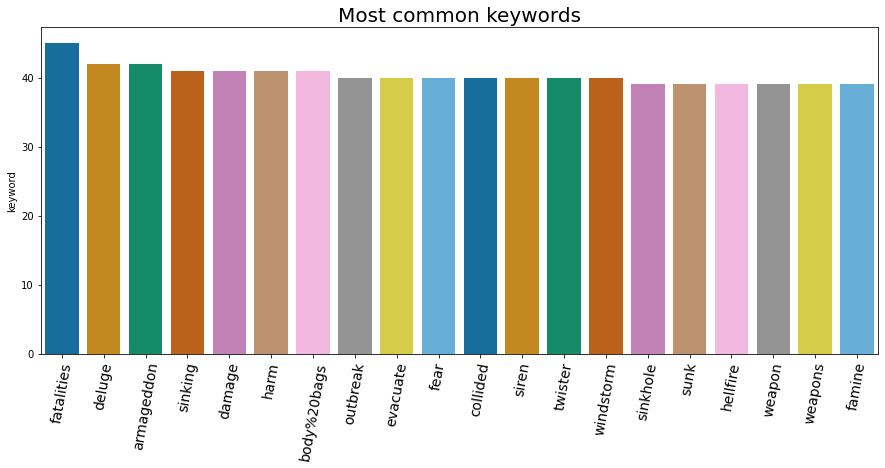

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,6))
sns.barplot(data = most_common_keywords, x = most_common_keywords.index, y = "keyword", palette = "colorblind")
plt.title("Most common keywords", size = 20)
plt.xticks(rotation = 80, size = 14)

In [17]:
disaster = train[train.text.str.contains("disaster")]
disaster

,id,keyword,location,text,target
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
622,895,bioterrorism,"Hudson Valley, NY",Volunteers needed to participate in Emergency ...,1
1162,1673,bridge%20collapse,NaN,Australia's Ashes disaster - how the collapse ...,1
1182,1702,bridge%20collapse,UK,Australia's Ashes disaster - how the collapse ...,1
1558,2250,chemical%20emergency,"Mankato, MN",Emergency responders prepare for chemical disa...,1
...,...,...,...,...,...
7041,10088,typhoon,NaN,Obama Declares Disaster for Typhoon-Devastated...,1
7052,10105,typhoon,NYC :) Ex- #Islamophobe,#ABCNews Obama Declares Disaster for Typhoon-D...,1
7053,10106,typhoon,Dhaka,Obama Declares Disaster for Typhoon-Devastated...,1
7368,10550,windstorm,"Lagos, Nigeria",NEMA Ekiti distributed relief materials to aff...,1


In [18]:
disaster_df = disaster.target.value_counts().to_frame()
disaster_df

,target
1,77
0,32


In [19]:
disaster_df = disaster_df.rename(index={1:"Disaster", 0:"Not a disaster"})

In [20]:
disaster_df

,target
Disaster,77
Not a disaster,32


## Visualise disaster tweets using pie chart

<AxesSubplot:title={'center':'Disaster Tweets'}, ylabel='target'>

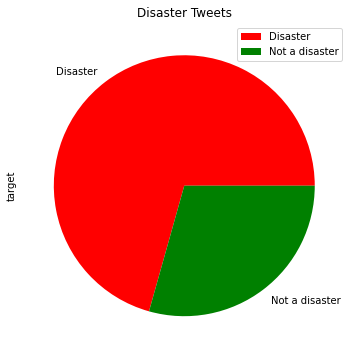

In [21]:
colors = ['red','green']
disaster_df.plot.pie(y = "target", figsize=(12,6), title = "Disaster Tweets", colors = colors)

## Location of tweets

In [22]:
top_20_location = train.location.value_counts()[:20].to_frame()
top_20_location

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


## Data Cleaning

In [23]:
train['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [24]:
test['text'].head()

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [25]:
# convert the text to lowercase
train['text'] = train['text'].apply(lambda x:x.lower())
test['text'] = test['text'].apply(lambda x:x.lower())

In [26]:
train['text'].head()

0    our deeds are the reason of this #earthquake m...
1               forest fire near la ronge sask. canada
2    all residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    just got sent this photo from ruby #alaska as ...
Name: text, dtype: object

In [27]:
test['text'].head()

0                   just happened a terrible car crash
1    heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             apocalypse lighting. #spokane #wildfires
4        typhoon soudelor kills 28 in china and taiwan
Name: text, dtype: object

This code uses the apply() function to convert the text in a specific column of a DataFrame, named 'text', to lowercase.

train['text'] is used to select the 'text' column of the DataFrame train. The apply() function is then used on this column to apply the lambda function lambda x: x.lower() to each element of the column.

The lambda function takes in a single argument, x, which represents each element in the 'text' column. The .lower() method is then called on x to convert the text to lowercase. The result of this method call is then returned, which is then assigned back to the same column 'text' to update the text case of the column.

So this code will convert all the text in the 'text' column of the DataFrame train/test to lowercase.

In [28]:
# remove []
# this code will remove any substrings of the form [...] from the text in the 'text' column of the DataFrame train/test

import re

train['text'] = train['text'].apply(lambda x:re.sub('\[.*?\]', '', x))
test['text'] = test['text'].apply(lambda x:re.sub('\[.*?\]', '', x))

This code is using the apply() function to clean the text in a specific column of a DataFrame, named 'text' in the train DataFrame.

train.text is used to select the 'text' column of the DataFrame train. The apply() function is then used on this column to apply the lambda function lambda x: re.sub('\[.*?\]', '', x) to each element of the column.

The lambda function takes in a single argument, x, which represents each element in the 'text' column. The re.sub() function is then called on x to remove any substrings of the form [...] from the text. The re.sub() function is a regular expression function that finds all instances of the given pattern (in this case, \[.*?\]) in the input string and replaces them with the second argument passed to the function (in this case, an empty string '') .

The result of this method call is then returned, which is then assigned back to the same column 'text' to update the text.

So this code will remove any substrings of the form [...] from the text in the 'text' column of the DataFrame train.

In [29]:
# remove <>
# code will remove any substrings of the form <...> from the text in the 'text' column of the DataFrame train/test

train['text'] = train['text'].apply(lambda x:re.sub('<.*?>+', '', x))
test['text'] = test['text'].apply(lambda x:re.sub('<.*?>+', '', x))

This code is using the apply() function to clean the text in a specific column of a DataFrame, named 'text' in the train DataFrame.

train.text is used to select the 'text' column of the DataFrame train. The apply() function is then used on this column to apply the lambda function lambda x: re.sub('<.*?>+', '', x) to each element of the column.

The lambda function takes in a single argument, x, which represents each element in the 'text' column. The re.sub() function is then called on x to remove any substrings of the form <...> from the text. The re.sub() function is a regular expression function that finds all instances of the given pattern (in this case, <.*?>+) in the input string and replaces them with the second argument passed to the function (in this case, an empty string '') .

The regular expression <.*?>+ will match one or more < and > characters with any characters in between them, which is typically used to match HTML tags.

The result of this method call is then returned, which is then assigned back to the same column 'text' to update the text.

So this code will remove any substrings of the form <...> from the text in the 'text' column of the DataFrame train.

In [30]:
with_http = train[train.text.str.contains("http")]
with_http

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd wholesale markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy. #metal #rt h...,0
33,50,ablaze,AFRICA,#africanbaze: breaking news:nigeria flag set a...,1
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
37,55,ablaze,World Wide!!,inec office in abia set ablaze - http://t.co/3...,1
...,...,...,...,...,...
7606,10866,NaN,NaN,suicide bomber kills 15 in saudi security site...,1
7607,10867,NaN,NaN,#stormchase violent record breaking ef-5 el re...,1
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7610,10871,NaN,NaN,m1.94 ?5km s of volcano hawaii. http://t.co/zd...,1


In [31]:
pd.set_option('display.max_colwidth', None)

In [32]:
with_http

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd wholesale markets ablaze http://t.co/lhyxeohy6c,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy. #metal #rt http://t.co/yao1e0xngw,0
33,50,ablaze,AFRICA,#africanbaze: breaking news:nigeria flag set ablaze in aba. http://t.co/2nndbgwyei,1
35,53,ablaze,"London, UK",on plus side look at the sky last night it was ablaze http://t.co/qqsmshaj3n,0
37,55,ablaze,World Wide!!,inec office in abia set ablaze - http://t.co/3imaomknna,1
...,...,...,...,...,...
7606,10866,NaN,NaN,suicide bomber kills 15 in saudi security site mosque - reuters via world - google news - wall ... http://t.co/nf4iculoje,1
7607,10867,NaN,NaN,#stormchase violent record breaking ef-5 el reno oklahoma tornado nearly runs over ... - http://t.co/3sicroaanz http://t.co/i27oa0hisp,1
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse into nearby homes http://t.co/stfmbbzfb5,1
7610,10871,NaN,NaN,m1.94 ?5km s of volcano hawaii. http://t.co/zdtoyd8ebj,1


In [33]:
# removing hyperlink
train['text'] = train['text'].apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )
test['text'] = test['text'].apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )

This code uses the apply method on the train.text column to remove any text that matches the regular expression https?://\S+|www\.\S+. The apply method applies the function passed as an argument to each element in the column, in this case a lambda function that uses the re.sub function to remove any text that matches the regular expression.

The regular expression https?://\S+|www\.\S+ matches any text that starts with "http" or "https" followed by "://" and any number of non-whitespace characters (denoted by \S+) or it matches text that starts with "www." and any number of non-whitespace characters.

In summary, this code is removing all URLs from the train.text column.

In [34]:
train.iloc[31]

id                                         48
keyword                                ablaze
location                           Birmingham
text        @bbcmtd wholesale markets ablaze 
target                                      1
Name: 31, dtype: object

In [35]:
# removing puncuation

import string

train['text'] = train['text'].apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
test['text'] = test['text'].apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )


This code uses the apply method on the train.text column to remove any punctuation characters that are present in the string.punctuation list. The apply method applies the function passed as an argument to each element in the column, in this case a lambda function that uses the re.sub function to remove any punctuation characters that are present in the string.punctuation list.

The string.punctuation is a pre-initialized string in python, which contains all ASCII punctuation characters. The re.escape() method is used to escape any special characters in the string, so that they are treated as literal characters by the regular expression engine. The %s is a string format specifier, which is replaced by the re.escape(string.punctuation)

The regular expression '[%s]' % re.escape(string.punctuation) matches any punctuation characters that are present in the string.punctuation list.

In summary, this code is removing all punctuation characters from the train.text column.

In [36]:
# remove new line

train['text'] = train['text'].apply(lambda x:re.sub('\n' , '', x))
test['text'] = test['text'].apply(lambda x:re.sub('\n', '', x))

In [37]:
# remove words containing numbers

train['text'] = train['text'].apply(lambda x:re.sub('\w*\d\w*', '', x))
test['text'] = test['text'].apply(lambda x:re.sub('\w*\d\w*', '', x))

This code uses the apply method on the train.text column to remove any text that matches the regular expression \w*\d\w*. The apply method applies the function passed as an argument to each element in the column, in this case a lambda function that uses the re.sub function to remove any text that matches the regular expression.

The regular expression \w*\d\w* matches any text that contains a number (denoted by \d) surrounded by zero or more word characters (denoted by \w*).

In summary, this code is removing all substrings that contain a number (and any word characters before and after the number) from the train.text column.

In [38]:
pd.set_option('display.max_colwidth', None)

In [39]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake may allah forgive us all,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,people receive wildfires evacuation orders in california,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as smoke from wildfires pours into a school,1


In [40]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,heard about earthquake is different cities stay safe everyone
2,3,NaN,NaN,there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills in china and taiwan


## Word cloud from train text column



In [44]:
train["text"]

0                                                                       our deeds are the reason of this earthquake may allah forgive us all
1                                                                                                      forest fire near la ronge sask canada
2         all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
3                                                                                  people receive wildfires evacuation orders in california 
4                                                     just got sent this photo from ruby alaska as smoke from wildfires pours into a school 
                                                                        ...                                                                 
7608                                                                           two giant cranes holding a bridge collapse into nearby homes 
7609         

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create a string of text to generate the word cloud from
text = " ".join(tweet for tweet in train["text"])
print(len(text))


626832


In [46]:
type(text)

str

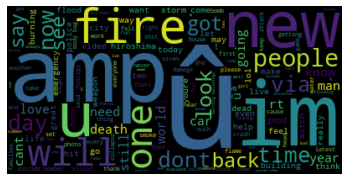

In [48]:
# Create a WordCloud object
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
# Let's seperate disaster_tweets and non_disaster_tweets

disaster_tweets = train[train['target']==1]['text']
non_disaster_tweets = train[train['target']==0]['text']

In [51]:
disaster_tweets.shape

(3271,)

In [52]:
non_disaster_tweets.shape

(4342,)

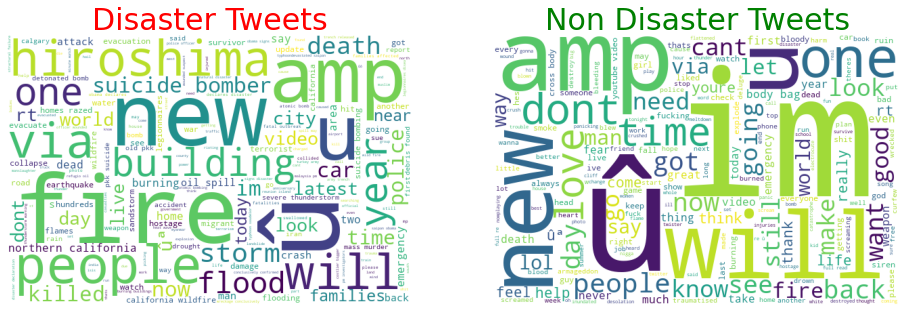

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=30, color="Red");

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=30, color="Green");

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. 

In [61]:
# Create a tokenizer object

import nltk
token = nltk.tokenize.RegexpTokenizer(r'\w+')

This code is using the NLTK library's RegexpTokenizer function to create a tokenizer object that will tokenize a string by matching sequences of word characters (i.e. alphanumeric characters and underscores) using the regular expression pattern '\w+'. When this tokenizer is used to tokenize a string, it will return a list of substrings that match this pattern, treating non-matching characters as token boundaries. The resulting tokens will only contain word characters.

In [63]:
train['text'].head()

0                                                                  our deeds are the reason of this earthquake may allah forgive us all
1                                                                                                 forest fire near la ronge sask canada
2    all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
3                                                                             people receive wildfires evacuation orders in california 
4                                                just got sent this photo from ruby alaska as smoke from wildfires pours into a school 
Name: text, dtype: object

In [64]:
test['text'].head()

0                                                                just happened a terrible car crash
1                                     heard about earthquake is different cities stay safe everyone
2    there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
3                                                             apocalypse lighting spokane wildfires
4                                                       typhoon soudelor kills  in china and taiwan
Name: text, dtype: object

In [65]:
# Apply the token

train['text'] = train['text'].apply(lambda x:token.tokenize(x))
test['text'] = test['text'].apply(lambda x:token.tokenize(x))


This above code is using the Pandas apply() method on the text column of a DataFrame train. It is passing in an anonymous function (also known as a "lambda function") as an argument to apply(). This lambda function takes one argument x, and applies the tokenize() method to it with the tokenizer object token created earlier.

The tokenize() method takes a string as its argument, and returns a list of tokens, which is a sequence of substrings that match the regular expression pattern specified in the RegexpTokenizer() function.

So, this code is tokenizing each text in the text column of the train DataFrame, and replacing the original text with the tokenized version.

In [66]:
train['text'].head()

0                                                                           [our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]
1                                                                                                                [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place, are, being, notified, by, officers, no, other, evacuation, or, shelter, in, place, orders, are, expected]
3                                                                                             [people, receive, wildfires, evacuation, orders, in, california]
4                                                       [just, got, sent, this, photo, from, ruby, alaska, as, smoke, from, wildfires, pours, into, a, school]
Name: text, dtype: object

In [67]:
test['text'].head()

0                                                                             [just, happened, a, terrible, car, crash]
1                                               [heard, about, earthquake, is, different, cities, stay, safe, everyone]
2    [there, is, a, forest, fire, at, spot, pond, geese, are, fleeing, across, the, street, i, cannot, save, them, all]
3                                                                            [apocalypse, lighting, spokane, wildfires]
4                                                                    [typhoon, soudelor, kills, in, china, and, taiwan]
Name: text, dtype: object

In [69]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brindhamanivannan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
# Removing stop words

train['text'] = train['text'].apply(lambda x:[w for w in x if w not in stopwords.words('english')])
test['text'] = test['text'].apply(lambda x:[w for w in x if w not in stopwords.words('english')])

This code is using the Pandas apply() method on the text column of a DataFrame train. It is passing in an anonymous function (also known as a "lambda function") as an argument to apply(). This lambda function takes one argument x, which is a list of tokens that represent a text.

It then uses a list comprehension to create a new list of tokens, containing only the tokens that are not present in the NLTK's list of English stopwords.

The stopwords.words('english') returns a list of english stopwords from the NLTK library.

So, this code is removing stopwords from the tokenized text in the text column of the train DataFrame, and replacing the original tokenized text with the stopword-removed version.

In [71]:
train['text']

0                                                                                   [deeds, reason, earthquake, may, allah, forgive, us]
1                                                                                          [forest, fire, near, la, ronge, sask, canada]
2                                   [residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expected]
3                                                                           [people, receive, wildfires, evacuation, orders, california]
4                                                                      [got, sent, photo, ruby, alaska, smoke, wildfires, pours, school]
                                                                      ...                                                               
7608                                                                      [two, giant, cranes, holding, bridge, collapse, nearby, homes]
7609                                 [ari

In [72]:
test['text'] 

0                                                                                  [happened, terrible, car, crash]
1                                                      [heard, earthquake, different, cities, stay, safe, everyone]
2                                          [forest, fire, spot, pond, geese, fleeing, across, street, cannot, save]
3                                                                        [apocalypse, lighting, spokane, wildfires]
4                                                                         [typhoon, soudelor, kills, china, taiwan]
                                                           ...                                                     
3258                                                [earthquake, safety, los, angeles, ûò, safety, fasteners, xrwn]
3259    [storm, ri, worse, last, hurricane, hardest, hit, yard, looks, like, bombed, around, still, without, power]
3260                                                                    

## Stemming

Stemming and lemmatization are both techniques used to reduce inflected (or sometimes derived) words to their base form, in order to facilitate processing and analysis of text. However, they work in slightly different ways:

- Stemming is a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. It is based on heuristics and rule-based approach and does not require a dictionary look-up. It can be faster but less accurate compared to lemmatization.

- Lemmatization is a more sophisticated process that involves understanding the context and converting the word to its base form taking into account the vocabulary and morphological analysis of the words. It uses a dictionary-based approach and requires more computational resources. It is more accurate but slower than stemming.

In simple terms, stemming is like a quick-and-dirty version of lemmatization, and lemmatization is like a more accurate, slower version of stemming.

In [73]:
# create an instance of a stemmer object

stemmer = nltk.stem.PorterStemmer()

This code is using the NLTK library's PorterStemmer class to create an instance of a stemmer object, called stemmer. The Porter stemmer is an algorithm for reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. It is based on heuristics and rule-based approach.

The stemmer object can be used to stem words by applying the stem() method to a given word. For example, stemmer.stem("running") will return "run" as the stemmed form of the word "running".

This stemmer is based on the algorithm developed by Martin Porter, which is based on heuristics and rule-based approach, it is widely used and considered as one of the best stemmer available in English language.

In [74]:
stemmer.stem("jumping")

'jump'

In [75]:
stemmer.stem("swimming")

'swim'

In [79]:
stemmer.stem("terrible")

'terribl'

In [76]:
# Stem and join

train['text'] = train['text'].apply(lambda x:" ".join(stemmer.stem(token) for token in x))
test['text'] = test['text'].apply(lambda x:" ".join(stemmer.stem(token) for token in x))

This code is using the apply() method to apply a lambda function to the 'text' column of the 'train' dataframe. The lambda function takes in a string (x), tokenizes it, applies the stemmer to each token, and then joins the stemmed tokens back into a single string.

The stemmer is an object that is used to reduce words to their root or base form. For example, the stemmer may convert "running" to "run" and "stemmer" to "stem". The stemmed words are then joined back into a single string using the join() method. The final outcome of this code will be the text column of the dataframe train, but with stemmed words in it.

In [77]:
train['text']

0                                                         deed reason earthquak may allah forgiv us
1                                                              forest fire near la rong sask canada
2                             resid ask shelter place notifi offic evacu shelter place order expect
3                                                       peopl receiv wildfir evacu order california
4                                              got sent photo rubi alaska smoke wildfir pour school
                                                   ...                                             
7608                                                 two giant crane hold bridg collaps nearbi home
7609            ariaahrari thetawniest control wild fire california even northern part state troubl
7610                                                                                 volcano hawaii
7611    polic investig ebik collid car littl portug ebik rider suffer seriou nonlif threaten injuri


In [78]:
test['text']

0                                                                     happen terribl car crash
1                                                heard earthquak differ citi stay safe everyon
2                                    forest fire spot pond gees flee across street cannot save
3                                                               apocalyps light spokan wildfir
4                                                           typhoon soudelor kill china taiwan
                                                 ...                                          
3258                                           earthquak safeti lo angel ûò safeti fasten xrwn
3259    storm ri wors last hurrican hardest hit yard look like bomb around still without power
3260                                                                 green line derail chicago
3261                                                       meg issu hazard weather outlook hwo
3262                                           cit

## Text Vectorization

Text Vectorization is the process of converting text into numerical representation.

Machine Learning algorithms cannot be used directly on any textual data as they can only process numerical data in the form of an array. This is why we need to convert text, images, audio or any type of data into numerical data first and then only we can use machine learning algorithms.

## Countvectorizer

CountVectorizer is a class in the scikit-learn library in Python that is used to convert a collection of text documents to a matrix of token counts. It is often used as a preprocessing step before applying machine learning algorithms to text data.

When you create an instance of the CountVectorizer class, you can specify certain parameters such as the minimum and maximum number of times a word must appear in a document to be included in the vocabulary, and whether to use stop words (common words that are not useful for analysis).

Once you have fit the CountVectorizer to your text data, it will create a vocabulary of words that were found in the text. Then, it will create a sparse matrix of token counts, where the rows represent the documents and the columns represent the words in the vocabulary. Each cell in the matrix contains the count of the number of times that word appears in that document.

It is a convenient way to represent text data in a numerical format that can be used by machine learning algorithms.

In [81]:
# Create an instance of the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [82]:
train_numerical = count_vectorizer.fit_transform(train['text'])
test_numerical = count_vectorizer.transform(test["text"])


This code creates an instance of the CountVectorizer class and assigns it to the variable "count_vectorizer". Then it uses the fit_transform() method of the CountVectorizer object to convert the text data in the 'text' column of the 'train' dataframe into a sparse matrix of token counts.

The fit_transform() method does two things:

1. It fits the CountVectorizer to the text data, which means it creates a vocabulary of words that were found in the text, based on the parameters specified when the CountVectorizer was created.

2. It transforms the text data into a sparse matrix of token counts, where the rows represent the documents and the columns represent the words in the vocabulary. Each cell in the matrix contains the count of the number of times that word appears in that document.

The result of this line of code is assigned to the variable train_numerical, which is a sparse matrix of token counts representing the text data in the 'text' column of the 'train' dataframe.

In [83]:
train_numerical

<7613x13407 sparse matrix of type '<class 'numpy.int64'>'
	with 65639 stored elements in Compressed Sparse Row format>

In [84]:
test_numerical

<3263x13407 sparse matrix of type '<class 'numpy.int64'>'
	with 24688 stored elements in Compressed Sparse Row format>

## Train the model

In [86]:
# Multinomial Naive Bayes classifier 
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

This code is using the MultinomialNB class from scikit-learn to create an instance of a Multinomial Naive Bayes classifier and assigns it to the variable nb_classifier.

In [88]:
# 5-fold cross-validation strategy which is repeated 3 times

from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score

cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
cross_val

RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1)

The RepeatedStratifiedKFold is a class from scikit-learn that creates a generator for splitting the data into train and test sets. It is used in this case to create a 5-fold cross-validation strategy which is repeated 3 times. The n_splits parameter specifies the number of folds and the n_repeats parameter specifies the number of times the cross-validation should be repeated, the random_state is used to ensure reproducibility.

In [89]:
scores = cross_val_score(nb_classifier, train_numerical, train["target"], cv=cross_val, scoring="f1")
scores

array([0.77127244, 0.75604053, 0.74760383, 0.74822415, 0.76228209,
       0.75396825, 0.75545171, 0.75917065, 0.75851148, 0.75409836,
       0.74584323, 0.74451411, 0.76682316, 0.75911252, 0.75862069])

Then, the code is using the cross_val_score() function to evaluate the performance of the classifier using the created splits. The function takes the classifier object (nb_classifier), the feature data (train_numerical), the target variable(train["target"]) and the cv generator(cross_val) as inputs. 

 The scoring parameter is set to "f1" which stands for F1 score, which is a commonly used metric for classification tasks, it balances precision and recall. The function returns an array of scores, one for each repetition of the k-fold cross-validation, which are assigned to the scores variable. The last line of the code is simply showing the scores array.

## Fitting model

In [90]:
nb_classifier.fit(train_numerical, train["target"])

MultinomialNB()

In [91]:
train['text'].values

array(['deed reason earthquak may allah forgiv us',
       'forest fire near la rong sask canada',
       'resid ask shelter place notifi offic evacu shelter place order expect',
       ..., 'volcano hawaii',
       'polic investig ebik collid car littl portug ebik rider suffer seriou nonlif threaten injuri',
       'latest home raze northern california wildfir abc news'],
      dtype=object)

In [92]:
train["target"].values

array([1, 1, 1, ..., 1, 1, 1])

## Pipeline

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([('Vectors', CountVectorizer(stop_words='english')),('tfidf', TfidfTransformer()),
     ('NB', MultinomialNB())])

pipe.fit(train['text'].values, train["target"].values)

Pipeline(steps=[('Vectors', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()), ('NB', MultinomialNB())])

This code is creating a pipeline object using the Pipeline class from scikit-learn. A pipeline is a way to chain together multiple steps of a machine learning workflow, such as feature extraction, preprocessing, and model fitting.

The pipeline object is called "pipe" and it is being constructed with a list of tuples, where each tuple represents a step in the pipeline. The first element of the tuple is a string that gives a name to the step, and the second element is an estimator object that performs the step.

The pipeline in this code is composed of three steps:

Vectors: The first step is to convert the text data into a matrix of token counts, it is using the CountVectorizer class with the 'stop_words' parameter set to 'english' which will remove stopwords from the text before vectorizing.

Tfidf: The second step is to transform the token count matrix into a Tf-idf representation using the TfidfTransformer class. Tf-idf stands for term frequency-inverse document frequency and it is a way to give more weight to important words and less weight to less important words.

NB: The final step is to train a Multinomial Naive Bayes classifier using the transformed data, it is using the MultinomialNB class.

Once the pipeline object is created, it is then fitted to the train data using the fit() method and passing the train.text.values as the feature data and train["target"].values as the target variable. It will sequentially execute all the steps specified in the pipeline and fit the final estimator (NB) to the processed data.




## Save pipeline object to a file

In [97]:
import pickle

with open('/Users/brindhamanivannan/NLP/Disaster_Tweets/pipeline_model.pkl', 'wb') as model_file:
  pickle.dump(pipe, model_file)

This code is using the pickle library to save a pipeline object called "pipe" to a file called "pipeline_model.pkl" in binary format. The 'wb' argument in the open function specifies that the file should be opened in binary write mode. The dump function is then used to write the "pipe" object to the open file. This allows you to save the pipeline object for later use, so that you don't have to retrain the model every time you want to use it.

## Save model nb_classifier to a file

In [98]:
with open('nb_class_model.pkl', 'wb') as model_file:
  pickle.dump(nb_classifier, model_file)

This code is using the pickle library to save a object called "nb_classifier" to a file called "nb_class_model.pkl" in binary format. The 'wb' argument in the open function specifies that the file should be opened in binary write mode. The dump function is then used to write the "nb_classifier" object to the open file. This allows you to save the object for later use, so that you don't have to retrain the model every time you want to use it. 

The object "nb_classifier" is  a trained Naive Bayes model with vectorization representation.

In [99]:
pred = nb_classifier.predict(test_numerical)

## Submission

In [105]:
sample_submission = pd.read_csv("/Users/brindhamanivannan/NLP/Disaster_Tweets/sample_submission.csv")
sample_submission["target"] = pred
sample_submission.to_csv("/Users/brindhamanivannan/NLP/Disaster_Tweets/submission.csv", index=False)

In [106]:
sample_submission = pd.read_csv("/Users/brindhamanivannan/NLP/Disaster_Tweets/submission.csv")
sample_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


## Kaggle Submission Screenshot

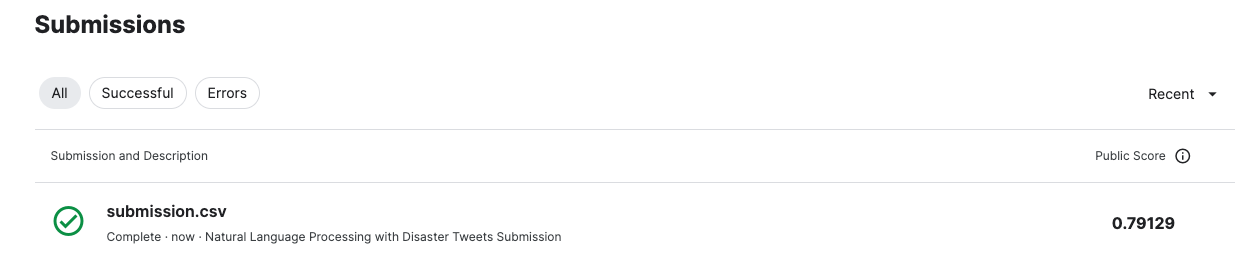